# Raisin Class Prediction EDA and LR - KNN - DT

# 1. Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams["figure.figsize"] = (9,5)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

| Besni | Kecimen|
| ------ | ------ |
| 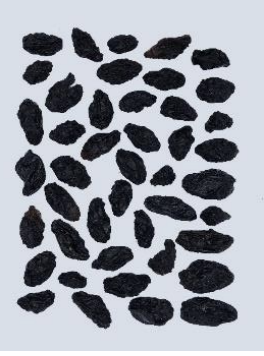 | 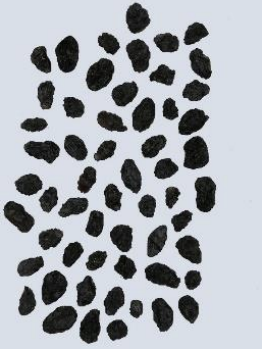 |

# Understanding the Data


Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Attribute Information:

1. **Area:** Gives the number of pixels within the boundaries of the raisin.
2. **Perimeter:** It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. **MajorAxisLength:** Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. **MinorAxisLength:** Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. **Eccentricity:** It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. **ConvexArea:** Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. **Extent:** Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. **Class:** Kecimen and Besni raisin.

For an ellipse, eccentricity (denoted by the letter "e") is a dimensionless parameter that quantifies how far the shape deviates from being a perfect circle. The eccentricity value ranges from 0 to 1.

* When eccentricity (e) is 0, the ellipse is a perfect circle.
* When eccentricity is close to 1 (approaching 1), the ellipse becomes more elongated and "flatter," looking like a thin oval shape.
* When eccentricity is exactly 1, the shape is a parabola.
* When eccentricity is greater than 1, the shape becomes a hyperbola.

# 2. Data

In [2]:
raisin = pd.read_excel("Raisin_Dataset.xlsx")
raisin.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen

In [3]:
raisin.sample(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
672   96139       498.387661       250.112037      0.864959      100204   
749   96753       477.499724       261.943408      0.836103       99964   
573  167279       690.071994       311.995692      0.891957      171794   
606   78304       390.973083       262.770416      0.740466       82394   
137   58495       368.739543       205.757871      0.829839       61496   

       Extent  Perimeter    Class  
672  0.675361   1298.138    Besni  
749  0.694107   1258.683    Besni  
573  0.578674   1680.121    Besni  
606  0.623286   1137.706    Besni  
137  0.630103    998.437  Kecimen

# 3. Exploratory Data Analysis

In [4]:
def SuperInfo(df, dropna=False):
    """
    Returns a dataframe consisting of datatypes, nuniques, #s of nulls head(1), most frequent item and its frequncy,
    where the column names are indices.
    """
    dt=pd.DataFrame(df.dtypes, columns=["Type"])
    dn=pd.DataFrame(df.nunique(), columns=["Nunique"])
    nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT=df.head(1).T.rename(columns={0:"First"})
    MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] for x in df.columns], columns=["MostFreqItem"],index=df.columns)
    MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] for x in df.columns], columns=["MostFreqCount"],index=df.columns)
    return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

In [5]:
SuperInfo(raisin, dropna=False)

Type  Nunique  #of Missing MostFreqItem  MostFreqCount  \
Area               int64      900            0        87524              1   
MajorAxisLength  float64      900            0   442.246011              1   
MinorAxisLength  float64      900            0   253.291155              1   
Eccentricity     float64      900            0     0.819738              1   
ConvexArea         int64      896            0        70719              2   
Extent           float64      900            0     0.758651              1   
Perimeter        float64      900            0      1184.04              1   
Class             object        2            0      Kecimen            450   

                      First  
Area                  87524  
MajorAxisLength  442.246011  
MinorAxisLength  253.291155  
Eccentricity       0.819738  
ConvexArea            90546  
Extent             0.758651  
Perimeter           1184.04  
Class               Kecimen

In [6]:
raisin.rename(columns = {'Area':'area','MajorAxisLength':'major_len','MinorAxisLength':'minor_len','Eccentricity':'ecc','ConvexArea':'c_area','Extent':'ext','Perimeter':'perimeter','Class':'class'}, inplace = True)

In [7]:
raisin_duplicated = raisin[raisin.duplicated() == True]
len(raisin_duplicated)

0

In [8]:
raisin.shape

(900, 8)

In [9]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       900 non-null    int64  
 1   major_len  900 non-null    float64
 2   minor_len  900 non-null    float64
 3   ecc        900 non-null    float64
 4   c_area     900 non-null    int64  
 5   ext        900 non-null    float64
 6   perimeter  900 non-null    float64
 7   class      900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [10]:
raisin.describe().T

count          mean           std           min           25%  \
area       900.0  87804.127778  39002.111390  25387.000000  59348.000000   
major_len  900.0    430.929950    116.035121    225.629541    345.442898   
minor_len  900.0    254.488133     49.988902    143.710872    219.111126   
ecc        900.0      0.781542      0.090318      0.348730      0.741766   
c_area     900.0  91186.090000  40769.290132  26139.000000  61513.250000   
ext        900.0      0.699508      0.053468      0.379856      0.670869   
perimeter  900.0   1165.906636    273.764315    619.074000    966.410750   

                    50%            75%            max  
area       78902.000000  105028.250000  235047.000000  
major_len    407.803951     494.187014     997.291941  
minor_len    247.848409     279.888575     492.275279  
ecc            0.798846       0.842571       0.962124  
c_area     81651.000000  108375.750000  278217.000000  
ext            0.707367       0.734991       0.835455  
perimeter   1119.509000    1308.389750    2697.753000

* All numerical values have smaller std, it looks data normally distributed and no outliers. But we need to check data visually and if neccesssary we can test the data.

# 4. Feature Observation

### Feature

In [11]:
fuel_consumption = ['area', 'major_len', 'minor_len', 'ecc', "c_area", "ext", "perimeter"]
for i in fuel_consumption:
    fig = px.box(raisin, x=i)
    fig.show()

### Target

In [12]:
raisin["class"].value_counts()

Kecimen    450
Besni      450
Name: class, dtype: int64

### Feature and Target

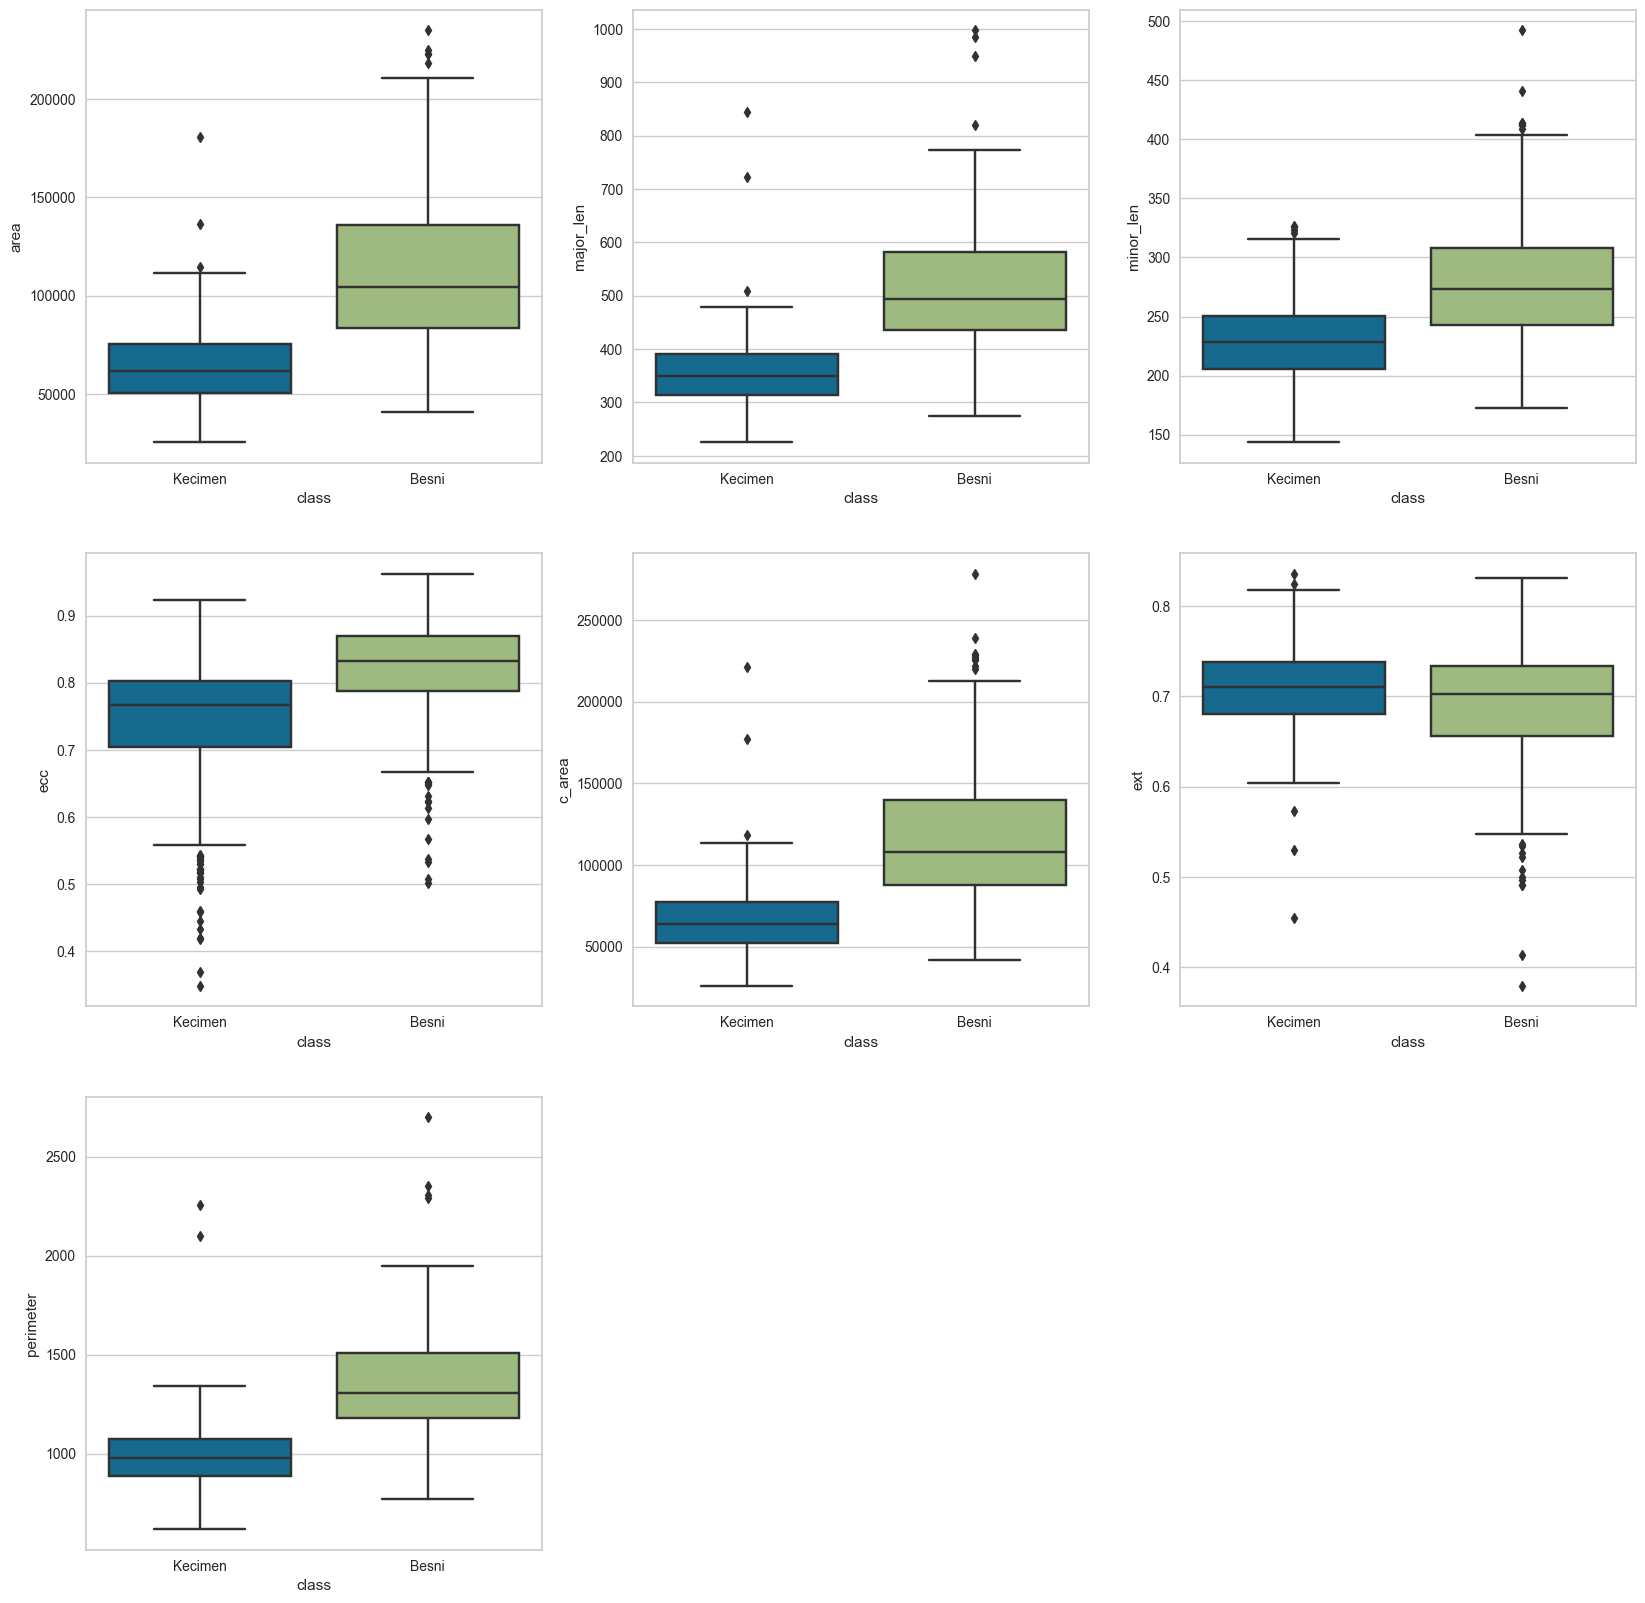

In [13]:
index = 0
plt.figure(figsize=(20,20))
for feature in raisin.columns:
    if feature != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=feature,data=raisin)
plt.show()

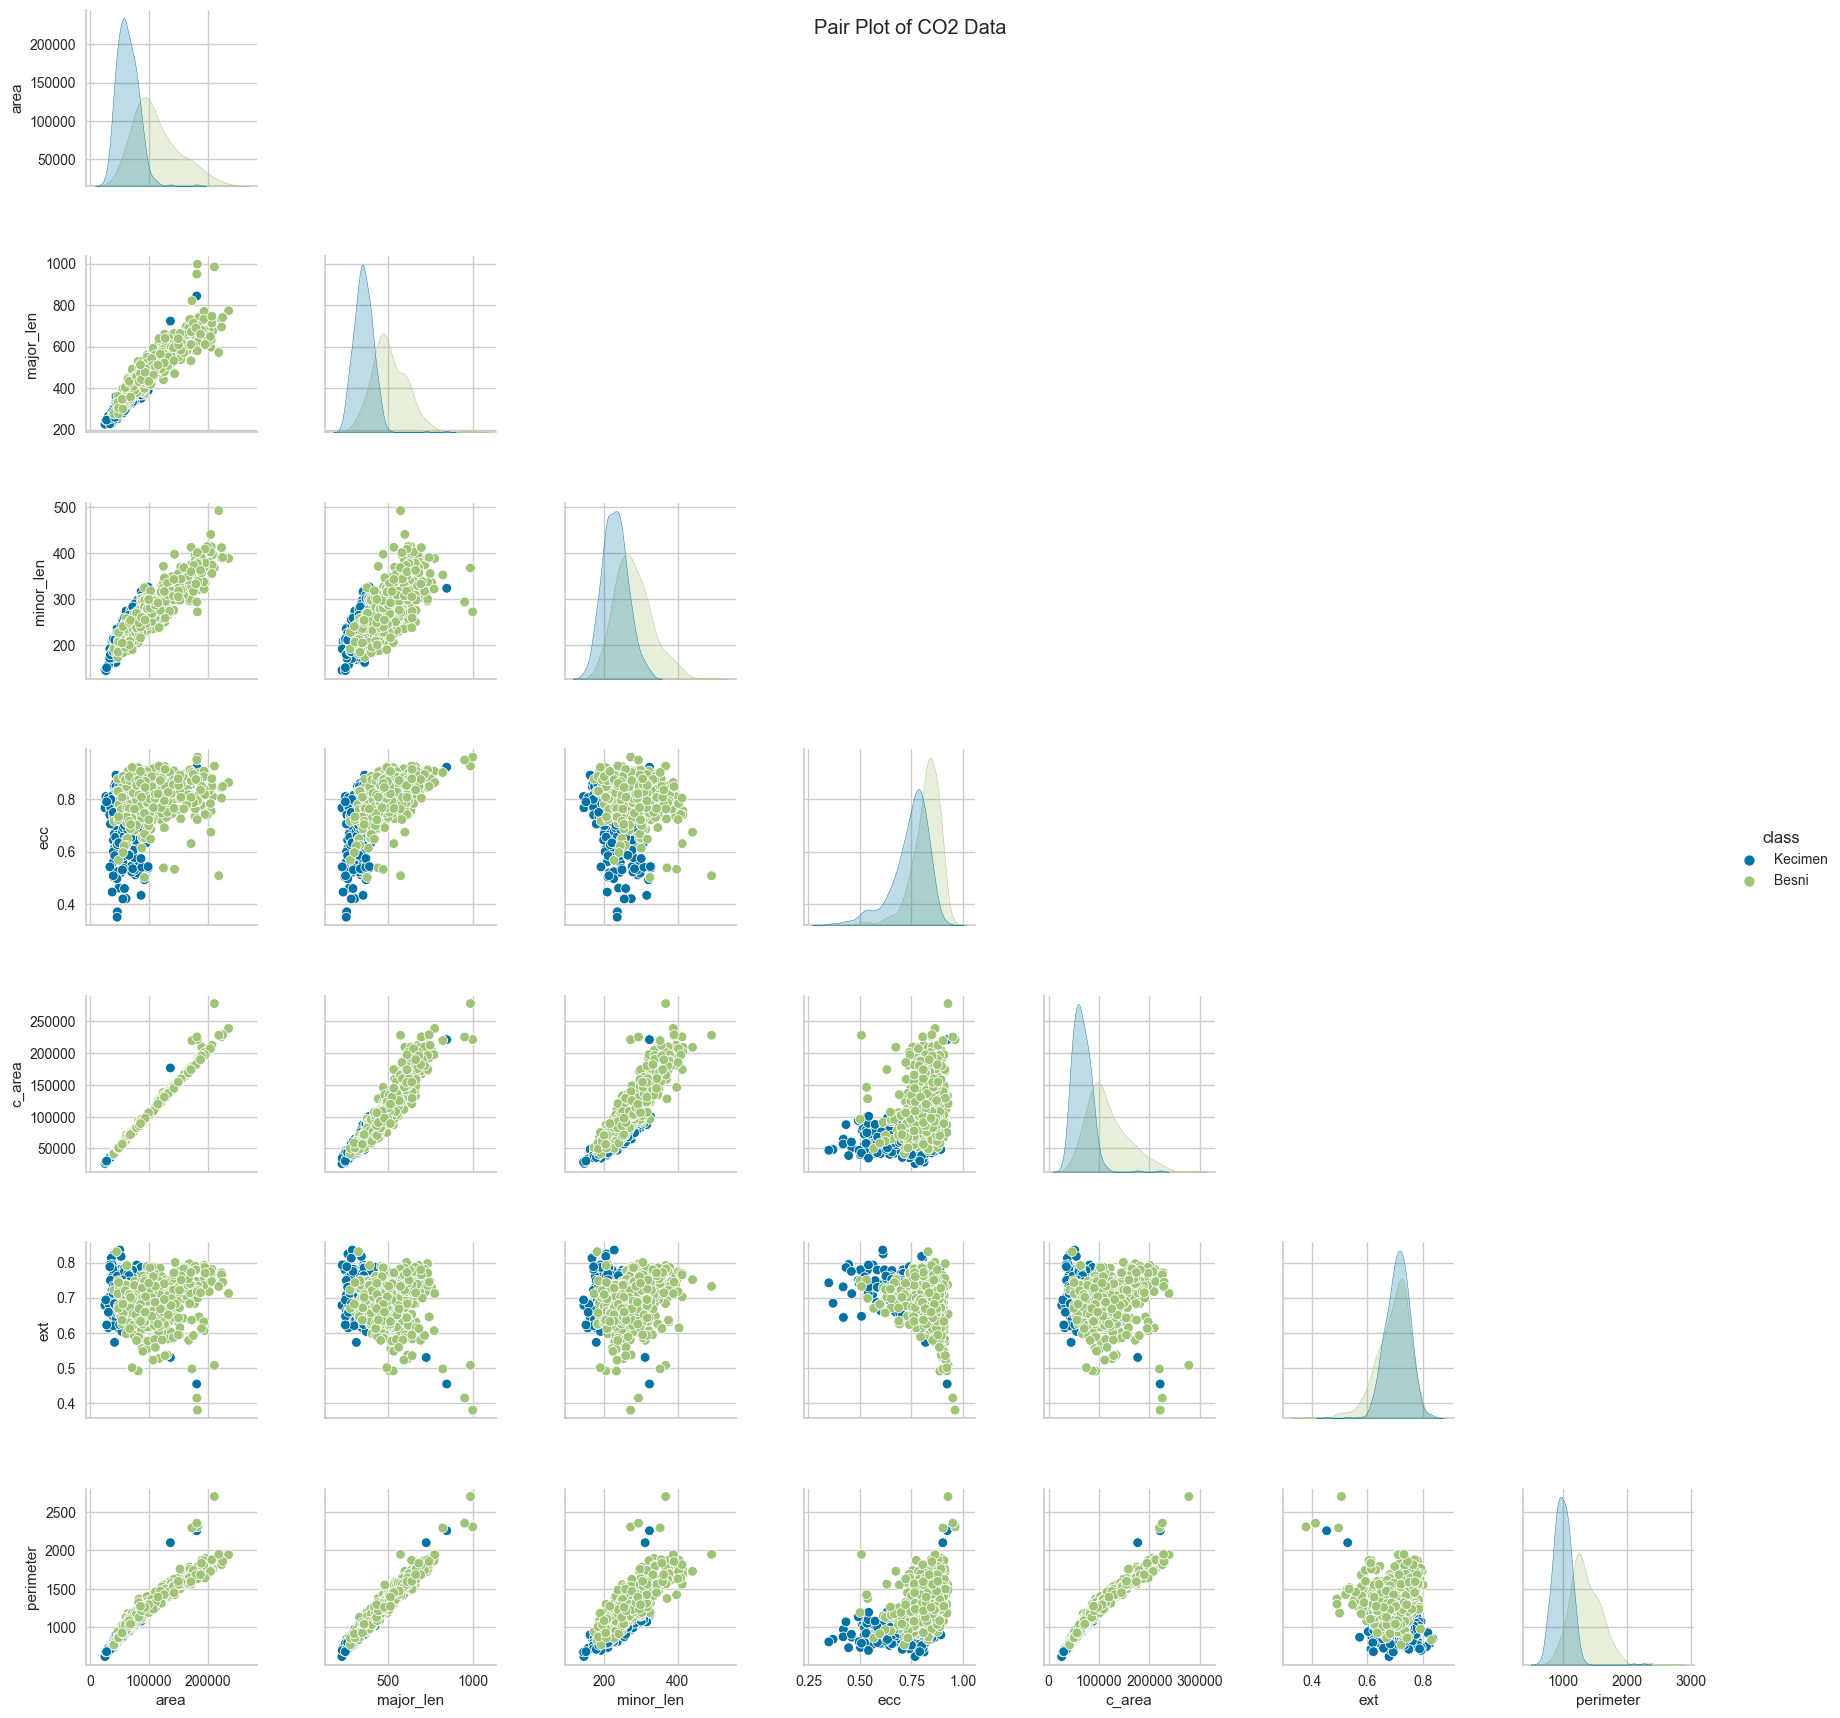

In [14]:
g = sns.pairplot(data=raisin, diag_kind="kde", hue="class")

# Set plot title and axis labels
plt.suptitle("Pair Plot of CO2 Data")
plt.xlabel("Variable")
plt.ylabel("Variable")

# Remove upper diagonal subplots
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].remove()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the plot
plt.show()

In [15]:
def categorize_trans(raisin_):
    if raisin_=="Kecimen":
        return 1
    else:
        return 0
    
raisin['class'] = raisin['class'].apply(categorize_trans)

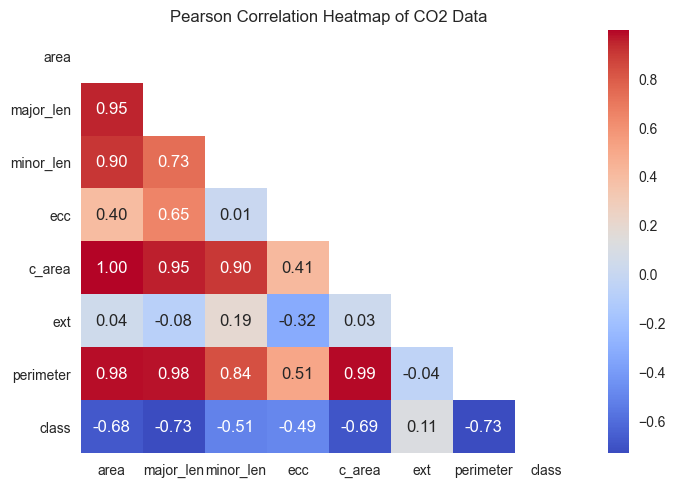

In [16]:
# Create a correlation heatmap
corr_matrix = raisin.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Change colors for upper and lower triangles
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f")

# Set plot title
plt.title("Pearson Correlation Heatmap of CO2 Data")

# Display the plot
plt.show()

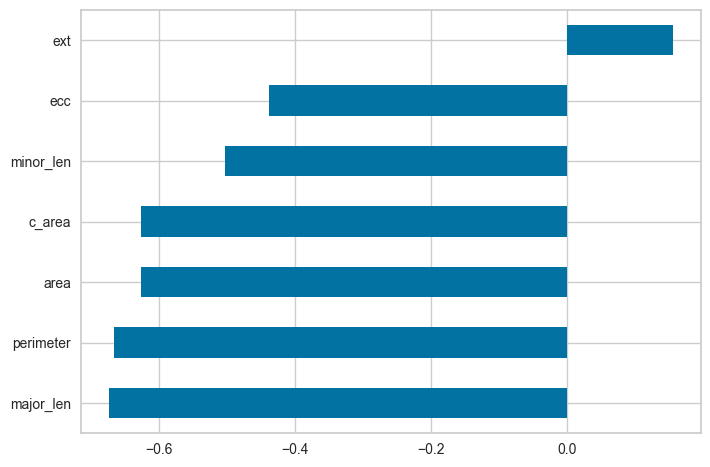

In [17]:
raisin.corr()["class"].drop("class").sort_values().plot.barh()
plt.show()

### Final Check

In [18]:
raisin.head()

area   major_len   minor_len       ecc  c_area       ext  perimeter  class
0  87524  442.246011  253.291155  0.819738   90546  0.758651   1184.040      1
1  75166  406.690687  243.032436  0.801805   78789  0.684130   1121.786      1
2  90856  442.267048  266.328318  0.798354   93717  0.637613   1208.575      1
3  45928  286.540559  208.760042  0.684989   47336  0.699599    844.162      1
4  79408  352.190770  290.827533  0.564011   81463  0.792772   1073.251      1

In [19]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       900 non-null    int64  
 1   major_len  900 non-null    float64
 2   minor_len  900 non-null    float64
 3   ecc        900 non-null    float64
 4   c_area     900 non-null    int64  
 5   ext        900 non-null    float64
 6   perimeter  900 non-null    float64
 7   class      900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [20]:
len(raisin[raisin.duplicated()])

0

# 5. Machine Learning Process¶

# Logistic Regression

### Lojistic Regression Model Assumptions and Application¶

Here are the Logistic Regression's assumptions.

* No excessive (outlier) or effective value.
* There should be no multicollinearity problem among independent variables.
* Sample size large enough to use model.
* There should be relationship between the dependent variable and the independent variable(at least interval scale).

### Splitting the dataset into X (independent variables) and y (dependent variable)¶

In [21]:
X = raisin.drop(["class"], axis=1)
y = raisin["class"]

### Train | Test Split and Scaling

* Data 1000'e kadar (row 1000'e kadarsa) %70 Train, %30 Test (Train için En düşük bu olmalı.).

* Data 1000 - 100.000 ler arasında ise %90-80 Train %10-20 Test.

* Data 100.000 - 1.000.000 lar arasında ise %95 Train %5 Test.

* Data milyonlar üzerinde ise %99 Train, %1 Test olarak bölünse iyi olur.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [23]:
y_train.value_counts()

1    365
0    355
Name: class, dtype: int64

### Scaling the Data

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model

In [25]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

area   major_len   minor_len       ecc  c_area       ext  perimeter  \
737   48007  302.611047  209.116084  0.722817   50679  0.677051    889.743   
877  126019  520.680034  316.189875  0.794501  130948  0.694511   1422.242   
636  105347  476.803500  282.025816  0.806310  108072  0.769035   1266.876   
600   89721  530.156574  223.499933  0.906794   95252  0.547433   1295.377   
711  204226  648.204288  402.283271  0.784118  207198  0.773988   1724.662   
531  104352  562.335908  239.402593  0.904851  107968  0.668067   1390.730   
838   92619  398.620729  296.882933  0.667315   95666  0.742997   1173.390   
651  103313  503.451439  266.445036  0.848474  108615  0.667043   1343.017   
631   90585  489.647789  239.350294  0.872384   95774  0.672345   1270.266   
867   66613  433.194164  199.814734  0.887266   70454  0.708951   1085.157   

     class  pred  pred_proba  
737      0     1    0.943108  
877      0     0    0.038918  
636      0     0    0.189856  
600      0     0    0.031202  
711      0     0    0.001068  
531      0     0    0.015304  
838      0     1    0.624923  
651      0     0    0.053217  
631      0     0    0.087910  
867      0     0    0.401146

### Evaluating the Model

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[298  57]
 [ 42 323]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       355
           1       0.85      0.88      0.87       365

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[83 12]
 [10 75]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.86      0.88      0.87        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [27]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
print(vif_data)

     feature          VIF
0       area  2276.501754
1  major_len  1894.686010
2  minor_len   778.342728
3        ecc   256.075179
4     c_area  2678.789620
5        ext   194.790036
6  perimeter  3518.698462


* We see VIF score shows that we have a high multicolinearity issues.

### Cross Validate

In [28]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.863889
test_precision_weighted    0.867063
test_recall_weighted       0.863889
test_f1_weighted           0.863417
dtype: float64

### GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(max_iter=100000, random_state=1)
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
solver = ["liblinear"]


param_grid = {"penalty" : penalty,
             "C" : C,
             "solver" : solver}
grid_model = GridSearchCV(log_model, param_grid = param_grid, scoring = "precision", cv=10)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=1),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='precision')

In [30]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l1', 'solver': 'liblinear'}

In [31]:
eval_metric(grid_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[299  56]
 [ 43 322]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       355
           1       0.85      0.88      0.87       365

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[84 11]
 [ 9 76]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        95
           1       0.87      0.89      0.88        85

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

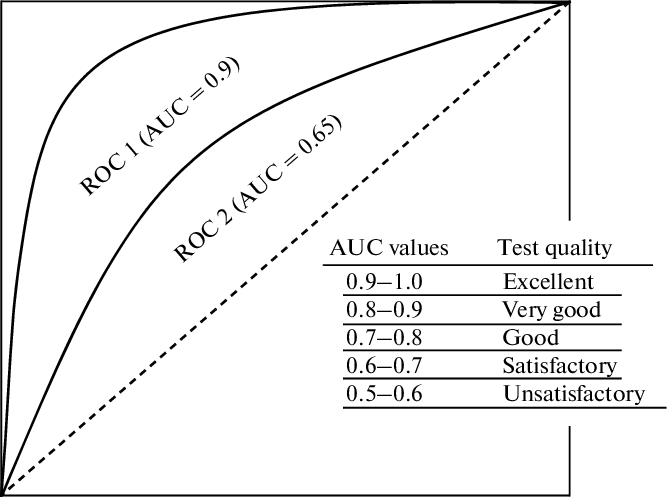

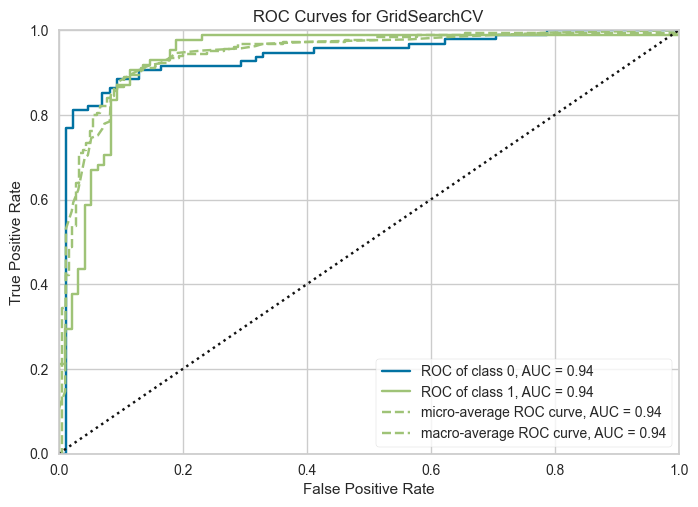

In [32]:
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

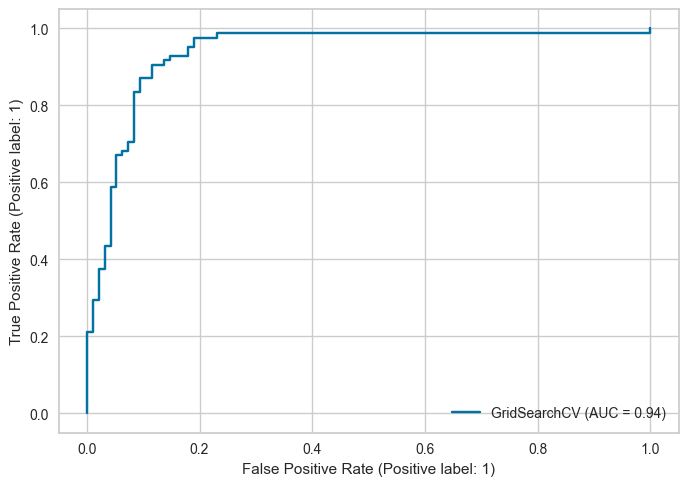

In [33]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)
plt.show()

In [34]:
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9374613003095975

## Finding Best Threshold for Accuracy (Youden Index)

Best treshold u bulmak için test setini kullanmıyoruz burada scale edilmiş train setini kullanıcaz. Data sızıntısını engellemek için. Kısaca bu tresholdubulurken mutlaka train setinden faydalanıcaz ve burada bulduğumuz tresholda göre test setinde tahmin yapacağız.

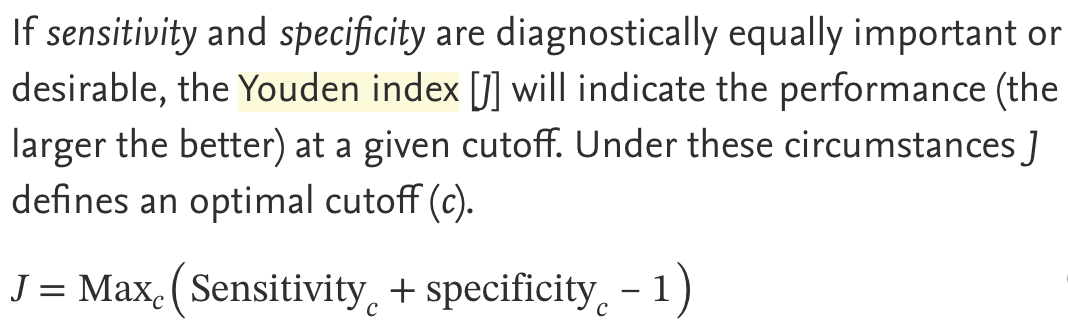

In [35]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5347334095295966

In [36]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
eval_metric(grid_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[299  56]
 [ 43 322]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       355
           1       0.85      0.88      0.87       365

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[84 11]
 [ 9 76]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        95
           1       0.87      0.89      0.88        85

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



In [37]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 1)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')
    
model = LogisticRegression(C= 0.1, penalty= 'l2',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      85.69%  std 2.16%
Precision-1   85.94%  std 3.87%
Recall-1      86.26%  std 6.23%
F1_score-1    85.85%  std 2.54%


* Optimizing threshold with respect to recall trade of gives the best result in the logistic model.
* 0.88 accuracy result obtained.

# KNN

### KNN Assumptions and Application¶

* It does not make any type of assumptions about the features and output of the dataset.

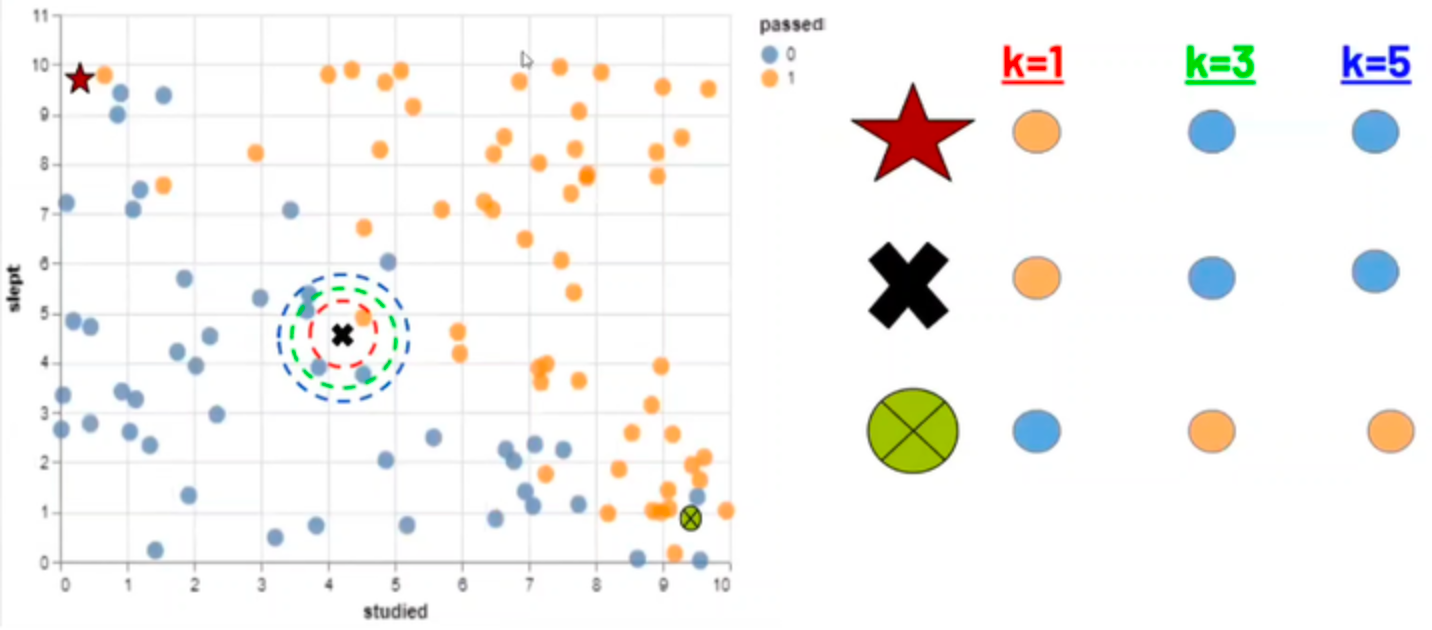

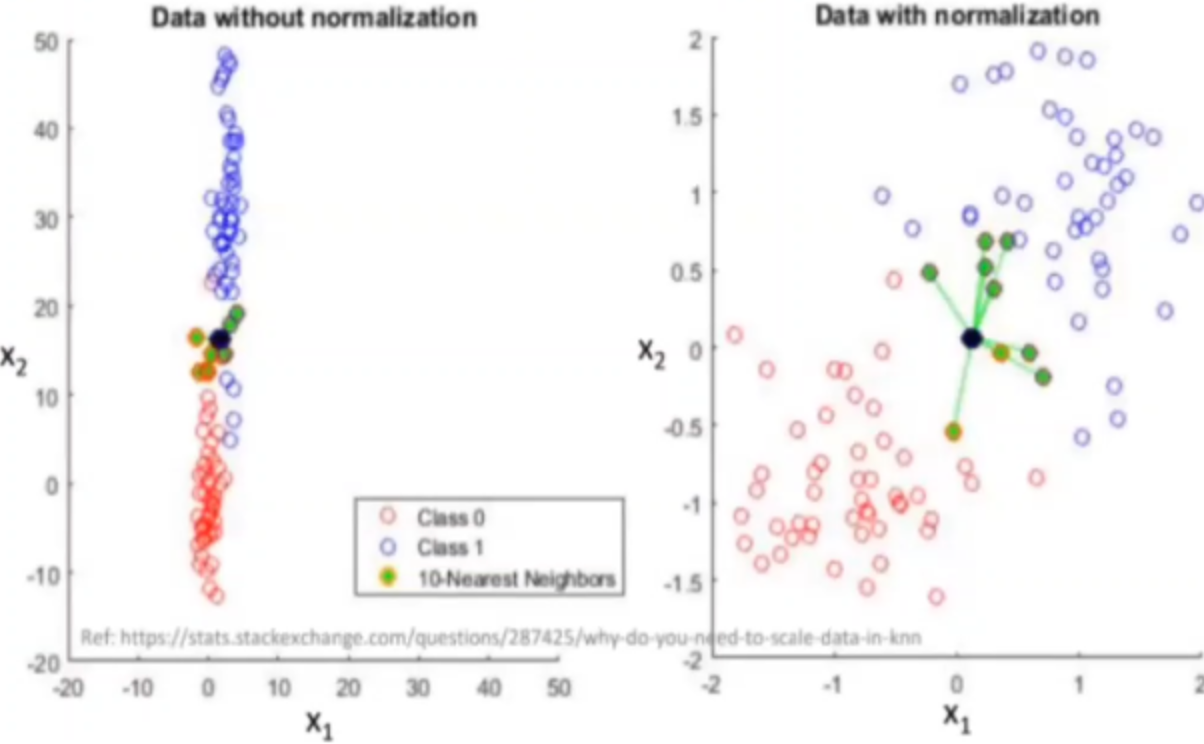

### Training the Model

In [38]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
411       1     1      0.8      0.2
314       1     1      1.0      0.0
860       0     0      0.0      1.0
632       0     0      0.2      0.8
467       0     0      0.0      1.0
49        1     1      1.0      0.0
765       0     0      0.0      1.0
47        1     1      1.0      0.0
880       0     0      0.0      1.0
550       0     0      0.4      0.6

In [39]:
raisin.iloc[[877,737,94]]

area   major_len   minor_len       ecc  c_area       ext  perimeter  \
877  126019  520.680034  316.189875  0.794501  130948  0.694511   1422.242   
737   48007  302.611047  209.116084  0.722817   50679  0.677051    889.743   
94    52243  331.451147  206.759599  0.781583   55774  0.714434    934.547   

     class  
877      0  
737      0  
94       1

## Model Performance on Classification Tasks

In [40]:
eval_metric(knn_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[297  58]
 [ 28 337]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       355
           1       0.85      0.92      0.89       365

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720


Test_Set
[[82 13]
 [ 9 76]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        95
           1       0.85      0.89      0.87        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



## Elbow Method for Choosing Reasonable K Values

In [41]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

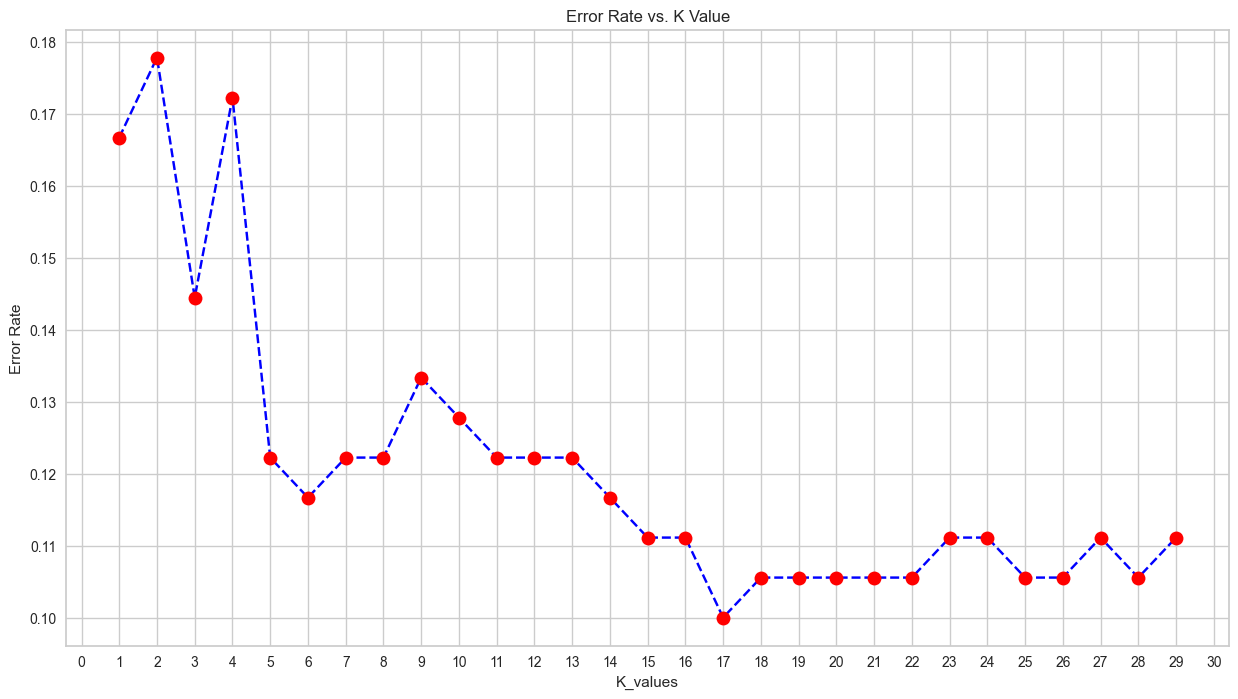

In [42]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

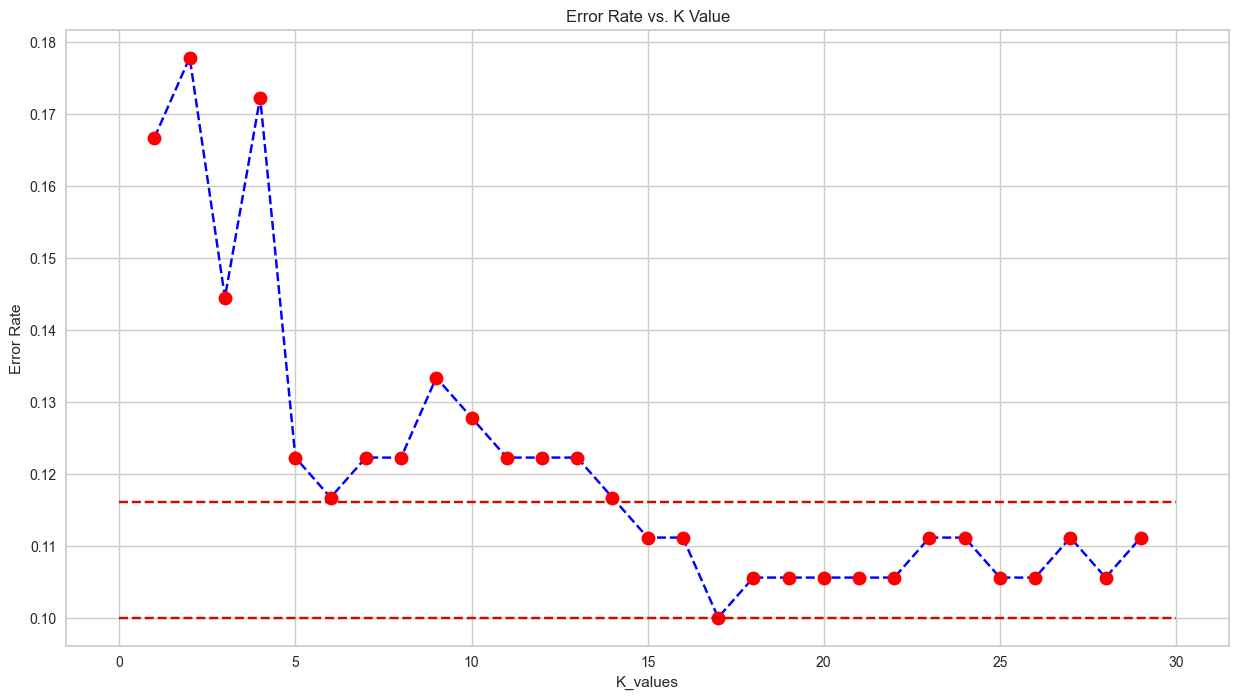

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.1, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.116, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

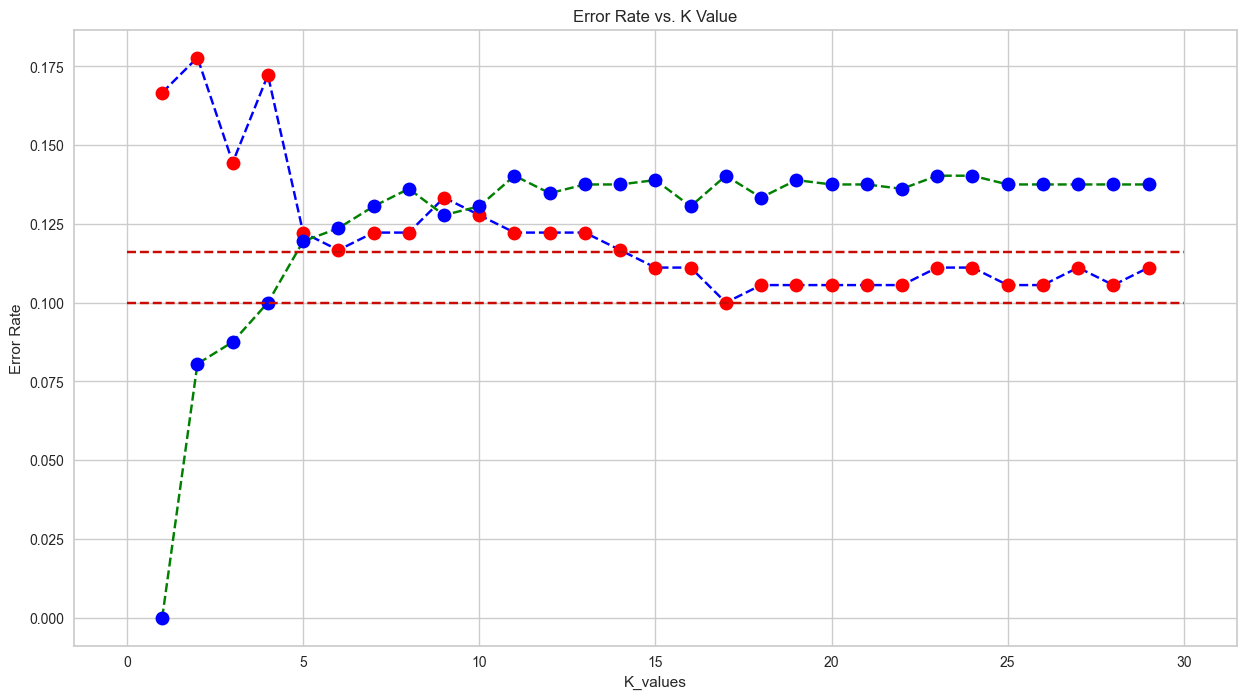

In [44]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.1, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.116, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

## Scores by Various K Values

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Train_Set
[[297  58]
 [ 28 337]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       355
           1       0.85      0.92      0.89       365

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720


Test_Set
[[82 13]
 [ 9 76]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        95
           1       0.85      0.89      0.87        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [46]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Train_Set
[[309  46]
 [ 43 322]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       355
           1       0.88      0.88      0.88       365

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720


Test_Set
[[84 11]
 [10 75]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        95
           1       0.87      0.88      0.88        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [47]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Train_Set
[[295  60]
 [ 32 333]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       355
           1       0.85      0.91      0.88       365

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[79 16]
 [ 8 77]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        95
           1       0.83      0.91      0.87        85

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [48]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Train_Set
[[302  53]
 [ 41 324]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       355
           1       0.86      0.89      0.87       365

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[82 13]
 [10 75]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        95
           1       0.85      0.88      0.87        85

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [49]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
print('WITH K=17\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=17

Train_Set
[[290  65]
 [ 36 329]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       355
           1       0.84      0.90      0.87       365

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[84 11]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        95
           1       0.88      0.92      0.90        85

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



## Cross Validate For Optimal K Value

In [50]:
model = KNeighborsClassifier(n_neighbors=17)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.861111
test_precision_weighted    0.866765
test_recall_weighted       0.861111
test_f1_weighted           0.860405
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

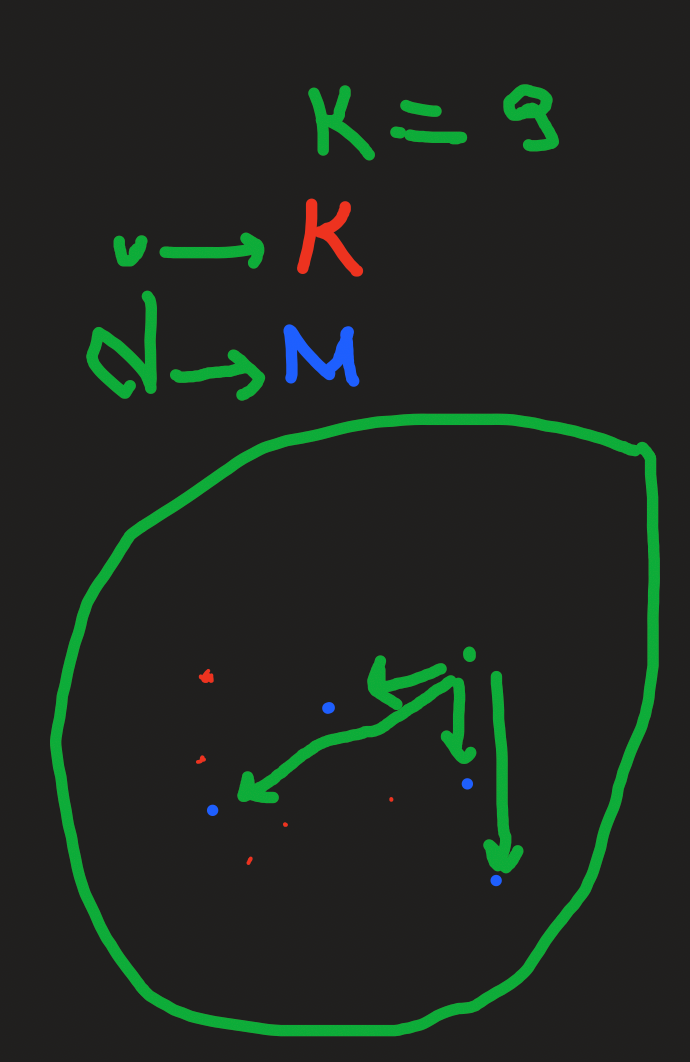

| P1 -> Manhattan | P2 -> Euclidean|
| ------ | ------ |
| 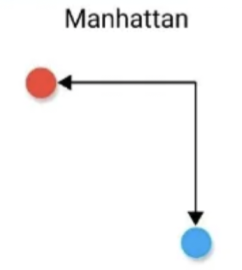 | 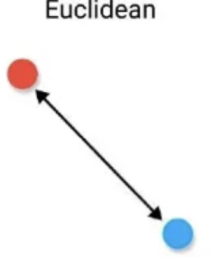 |

In [51]:
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
knn_grid_model.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

In [53]:
print('WITH K=28\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=28

Train_Set
[[355   0]
 [  0 365]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       365

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720


Test_Set
[[84 11]
 [10 75]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        95
           1       0.87      0.88      0.88        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



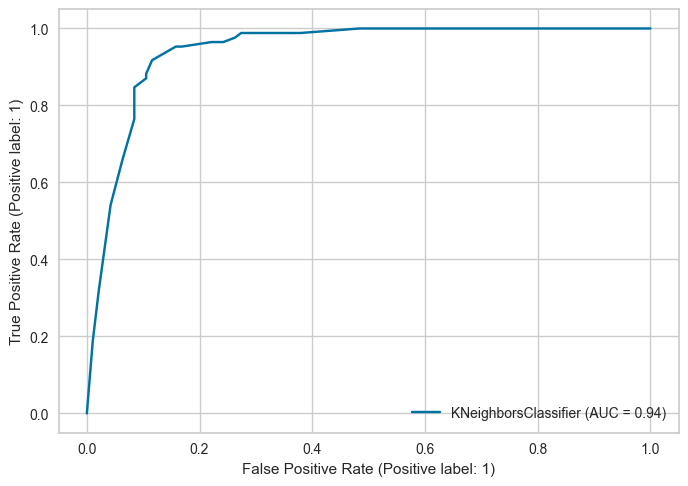

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=17).fit(X_train_scaled, y_train) #Elbow gives me power to use 17.
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.show()

In [55]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9432817337461301

In [56]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
print('WITH K=17\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=17

Train_Set
[[290  65]
 [ 36 329]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       355
           1       0.84      0.90      0.87       365

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[84 11]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        95
           1       0.88      0.92      0.90        85

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



Final Check

In [57]:
def categorize_trans(raisin_):
    if raisin_==1:
        return "Kecimen"
    else:
        return "Besni"
    
raisin['class'] = raisin['class'].apply(categorize_trans)

In [58]:
X = raisin.drop(["class"], axis=1)
y = raisin["class"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

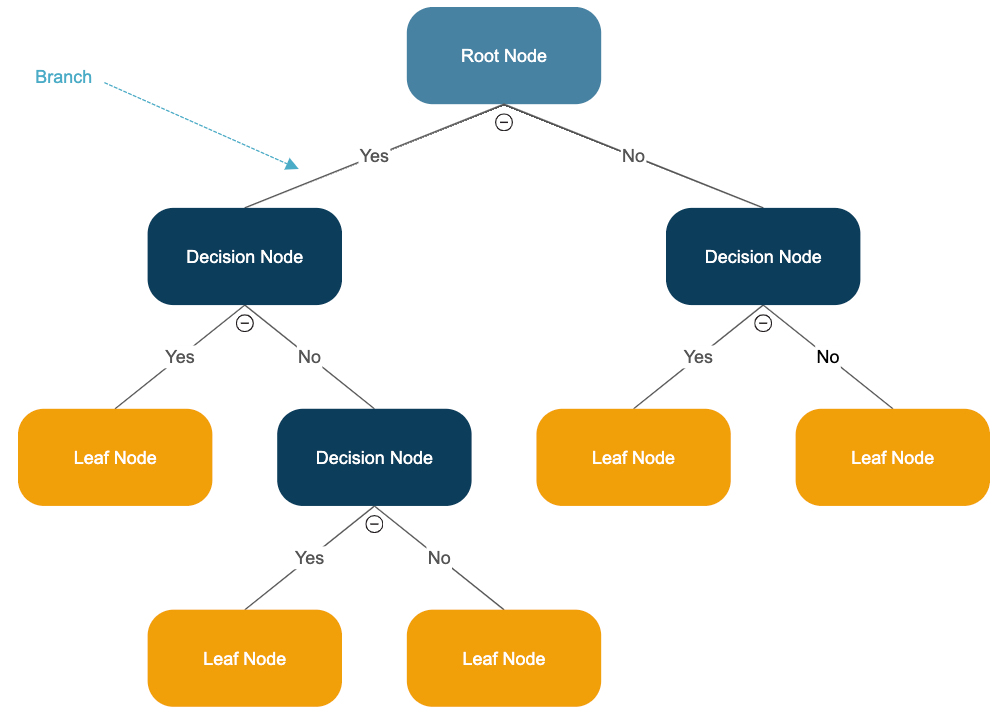

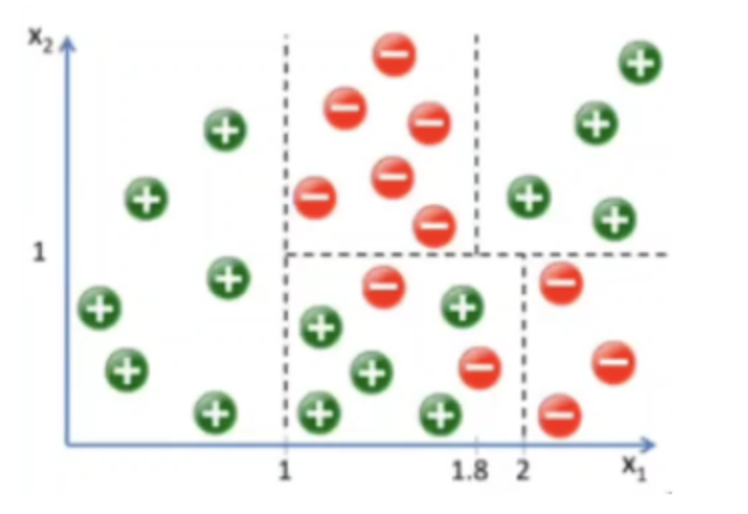

# Decision Tree

### Decision Tree Model Application¶

* In the beginning, the whole data is considered as the root, thereafter, we use the algorithms to make a split or divide the root into sub-trees.
* The feature values are considered to be categorical. If the values are continuous, then they are separated prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* The ordering of attributes as root or internal node of the tree is done using a statistical approach.

### Scaling

Karar ağaçlarında scaling işlemi neden tercih edilmez? 

Cevap: Bu model yapısı gereği karmaşık veri setlerinde kullanılabilir. Scale etmeye ve çok fazla Veri Ön İşleme’ye gerek duymazlar. Hatta Feature scaling işlemi değişkenlerin aralığını daralttığı için bu modelin çalışma mantığı olan düğüm oluşum mekanizmasını ve dolayısıyla sonucu da olumsuz etkilicektir.

### Training the Model

In [60]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Train_Set
[[355   0]
 [  0 365]]
              precision    recall  f1-score   support

       Besni       1.00      1.00      1.00       355
     Kecimen       1.00      1.00      1.00       365

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720


Test_Set
[[79 16]
 [19 66]]
              precision    recall  f1-score   support

       Besni       0.81      0.83      0.82        95
     Kecimen       0.80      0.78      0.79        85

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180



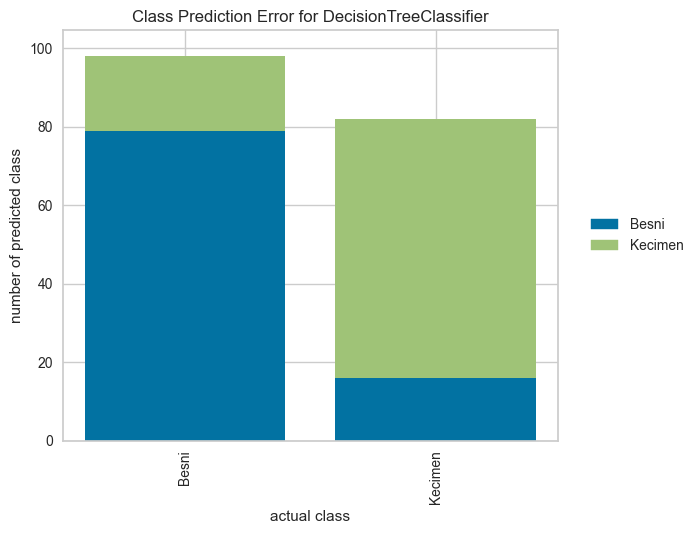

In [61]:
DT_model = DecisionTreeClassifier(random_state=1)
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

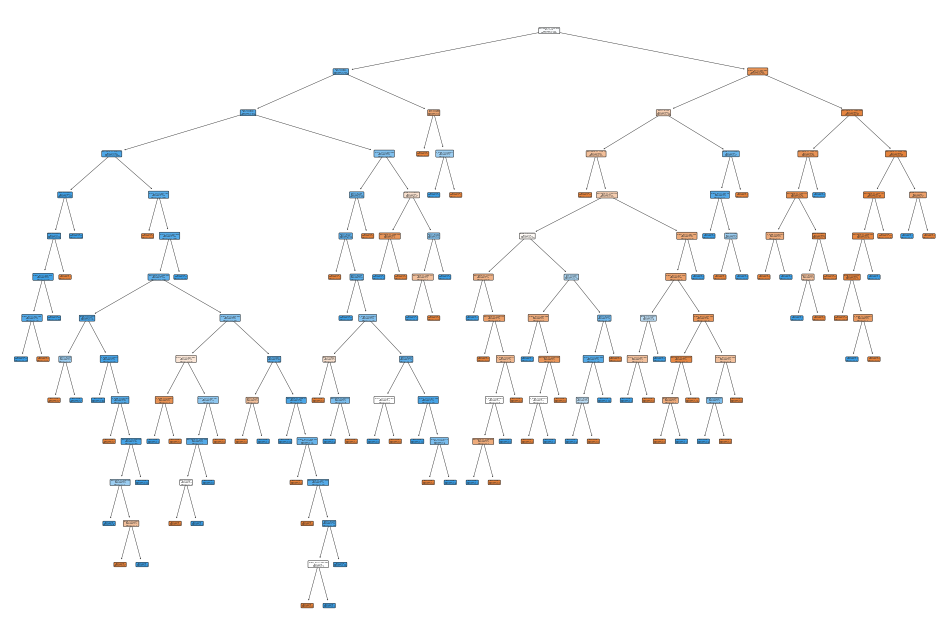

In [62]:
plt.figure(figsize=(12,8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X.columns);
plt.show()

## Feature Importances

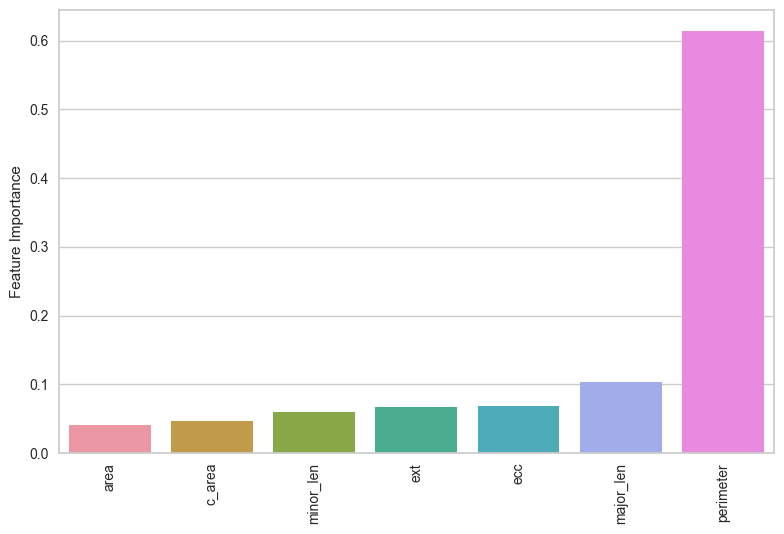

In [63]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Grid Search

In [64]:
model = DecisionTreeClassifier(random_state=101)

In [65]:
param_grid = {"splitter":["best", "random"],
              "max_features":[2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}

In [66]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)

In [67]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
grid_model.best_params_

{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[310  45]
 [ 49 316]]
              precision    recall  f1-score   support

       Besni       0.86      0.87      0.87       355
     Kecimen       0.88      0.87      0.87       365

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[86  9]
 [12 73]]
              precision    recall  f1-score   support

       Besni       0.88      0.91      0.89        95
     Kecimen       0.89      0.86      0.87        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



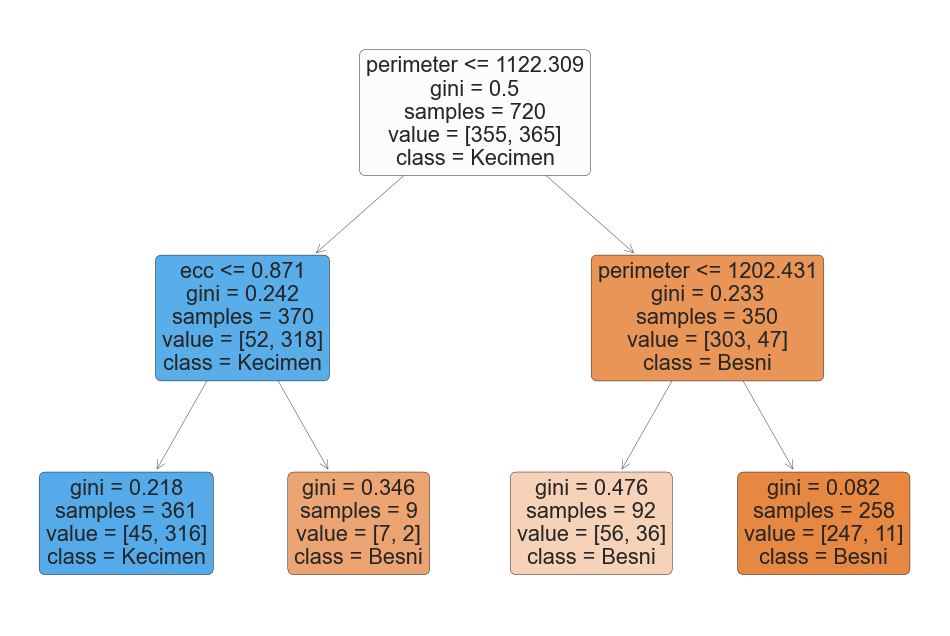

In [100]:
DT_model = DecisionTreeClassifier(random_state=101,
 max_depth = 2,
 max_features = 3,
 min_samples_leaf = 1,
 min_samples_split = 2,
 splitter= 'best')
DT_model.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X.columns, class_names=raisin["class"].unique()[::-1]);
plt.show()

In [71]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Train_Set
[[310  45]
 [ 49 316]]
              precision    recall  f1-score   support

       Besni       0.86      0.87      0.87       355
     Kecimen       0.88      0.87      0.87       365

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[86  9]
 [12 73]]
              precision    recall  f1-score   support

       Besni       0.88      0.91      0.89        95
     Kecimen       0.89      0.86      0.87        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



## Grid Search 2

+ Drop the most important feature.

In [72]:
X2 = raisin.drop(["class","perimeter"], axis=1)

In [73]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.20, random_state=1)

In [74]:
model = DecisionTreeClassifier(random_state=101)

In [75]:
param_grid = {"splitter":["best", "random"],
              "max_features":[2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}

In [76]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)

In [77]:
grid_model.fit(X2_train, y2_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [78]:
grid_model.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [79]:
eval_metric(grid_model, X2_train, y2_train, X2_test, y2_test)

Train_Set
[[281  74]
 [ 31 334]]
              precision    recall  f1-score   support

       Besni       0.90      0.79      0.84       355
     Kecimen       0.82      0.92      0.86       365

    accuracy                           0.85       720
   macro avg       0.86      0.85      0.85       720
weighted avg       0.86      0.85      0.85       720


Test_Set
[[80 15]
 [ 6 79]]
              precision    recall  f1-score   support

       Besni       0.93      0.84      0.88        95
     Kecimen       0.84      0.93      0.88        85

    accuracy                           0.88       180
   macro avg       0.89      0.89      0.88       180
weighted avg       0.89      0.88      0.88       180



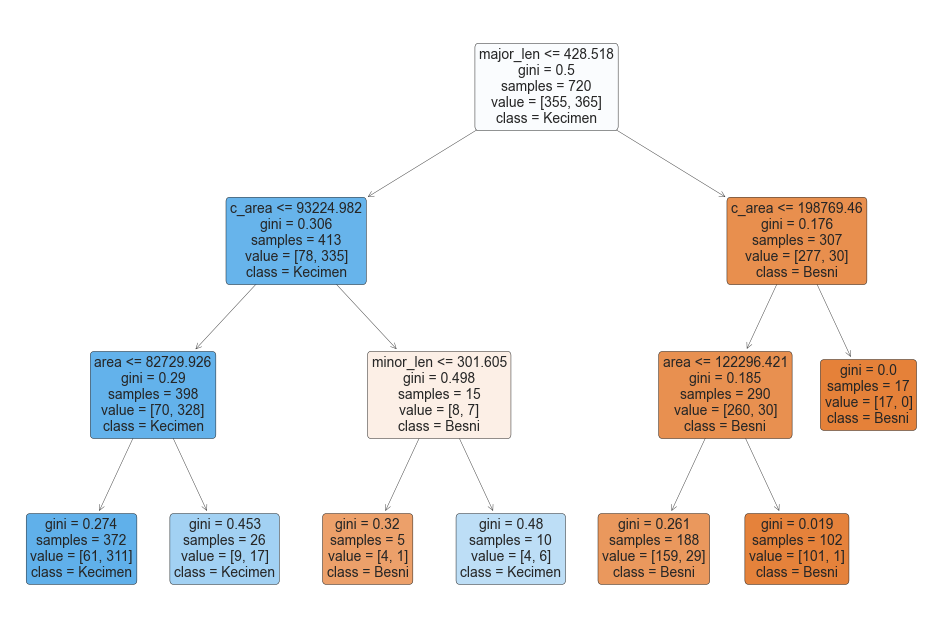

In [99]:
DT_model = DecisionTreeClassifier(random_state=101,
 max_depth = 3,
 max_features = 3,
 min_samples_leaf = 3,
 min_samples_split = 2,
 splitter= 'random')
DT_model.fit(X2_train, y2_train)

plt.figure(figsize=(12,8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X2.columns, class_names=raisin["class"].unique()[::-1]);
plt.show()

In [97]:
raisin["class"][(raisin["major_len"] <= 428.518)].value_counts()

Kecimen    414
Besni       94
Name: class, dtype: int64

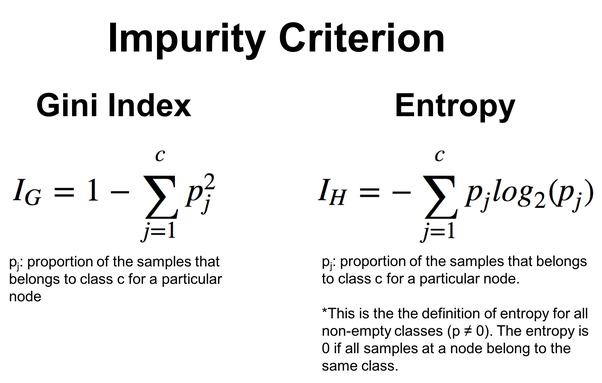

In [81]:
y2_train.value_counts()

Kecimen    365
Besni      355
Name: class, dtype: int64